In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Nano Banana 🍌: Gemini 2.5 Flash Image Recipes

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fnano-banana%2Fnano_banana_recipes.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/nano-banana/nano_banana_recipes.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/bigquery/v1/32px.svg" alt="BigQuery Studio logo"><br> Open in BigQuery Studio
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/nano-banana/nano_banana_recipes.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| Author |
| --- |
| [Chouaieb Nemri](https://github.com/cnemri) |

Welcome to Nano Banana Recipes! This notebook offers a collection of practical examples and best practices for leveraging the Gemini 2.5 Flash model for a variety of image generation and editing tasks.

Each recipe is designed to be clear, easy to follow, and adaptable for your own projects, demonstrating a specific capability of the model.

## Environment Setup

Begin by installing the required Python packages for the notebook.

In [1]:
%pip install --upgrade --quiet google-genai pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 6.6 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [2]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Configure Google Cloud Project

To use Vertex AI, you need a Google Cloud project with the [Vertex AI API enabled](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

For more details, see the documentation on [setting up a project and development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [3]:
# Use the environment variable if the user doesn't provide Project ID.
import os

# fmt: off
PROJECT_ID = "sascha-playground-doit"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
# fmt: on
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = "global"

from google import genai

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

## Core Functions and Utilities

This section contains the helper functions that will be used throughout the notebook to streamline image generation and processing tasks.

In [4]:
import io

from IPython.display import display
from PIL import Image
from google.genai import types

# --- Model and Generation Configuration ---
MODEL_NAME = "gemini-2.5-flash-image-preview"
GENERATION_CONFIG = types.GenerateContentConfig(
    temperature=1,
    top_p=0.95,
    max_output_tokens=32768,
    response_modalities=["TEXT", "IMAGE"],
)


def create_blank_canvas(
    aspect_ratio: str = "1:1",
    width: int | None = None,
    height: int | None = None,
    color: str = "white",
) -> types.Part:
    """Creates a blank image canvas with a specified aspect ratio or custom dimensions."""
    aspect_ratios = {
        "1:1": (1024, 1024),
        "3:4": (768, 1024),
        "4:3": (1024, 768),
        "9:16": (720, 1280),
        "16:9": (1280, 720),
    }

    if aspect_ratio == "custom":
        if not all([width, height]):
            raise ValueError("Width and height are required for custom aspect ratio.")
        final_width, final_height = width, height
    elif aspect_ratio in aspect_ratios:
        final_width, final_height = aspect_ratios[aspect_ratio]
    else:
        raise ValueError(f"Unsupported aspect ratio: {aspect_ratio}")

    image = Image.new("RGB", (final_width, final_height), color)
    buffer = io.BytesIO()
    image.save(buffer, format="PNG")
    return types.Part.from_bytes(data=buffer.getvalue(), mime_type="image/png")


def generate_and_display_image(contents: list) -> None:
    """Generates an image using Gemini and displays it."""
    response = client.models.generate_content(
        model=MODEL_NAME,
        contents=contents,
        config=GENERATION_CONFIG,
    )

    if response.candidates and response.candidates[0].content.parts:
        for part in response.candidates[0].content.parts:
            if part.inline_data and part.inline_data.data:
                display(Image.open(io.BytesIO(part.inline_data.data)))
                return
    print("No image was generated.")

## Recipe 1: Generate an Image from Scratch

This basic recipe demonstrates how to generate an image from a text prompt. You provide a description, and the model creates a visual representation.

Generating image from scratch...


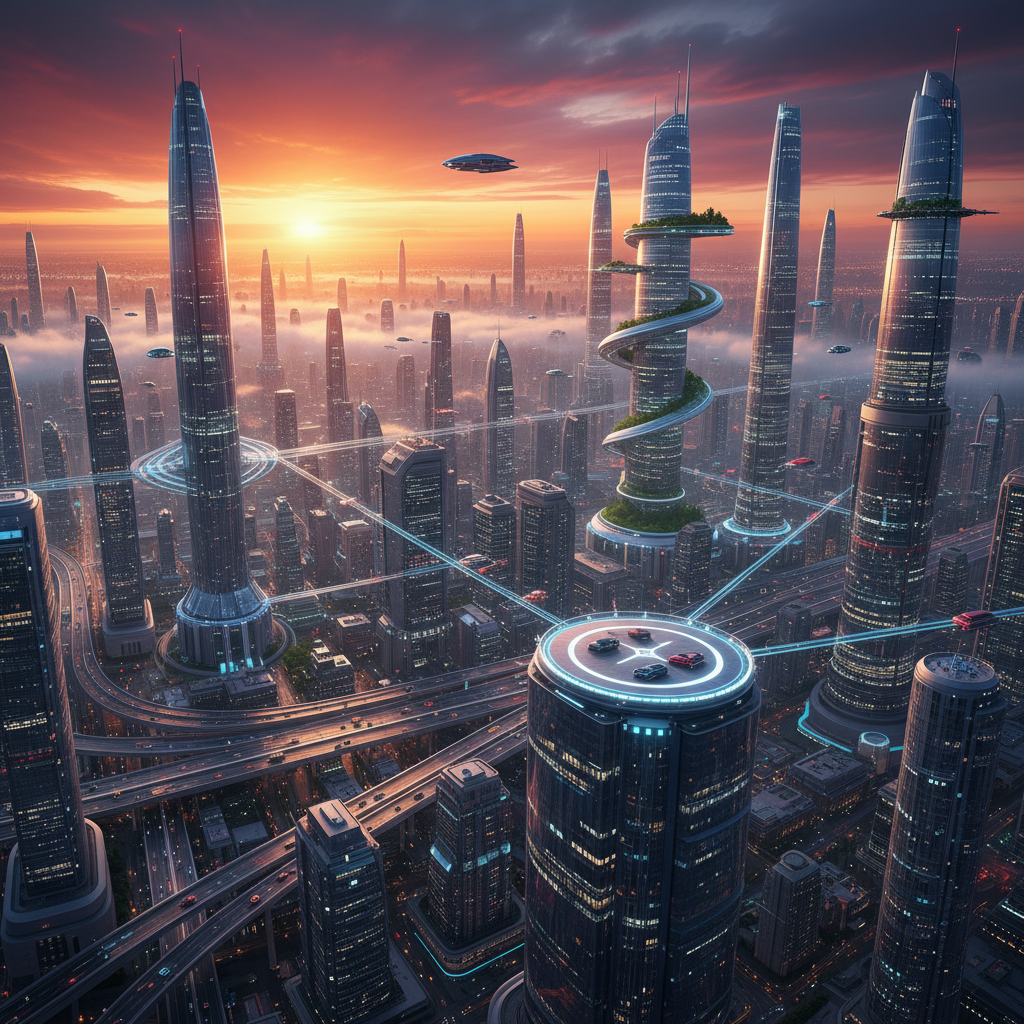

In [5]:
prompt = "A futuristic cityscape at sunset, with flying cars and towering, glowing skyscrapers."
contents = [types.Content(role="user", parts=[types.Part.from_text(text=prompt)])]

print("Generating image from scratch...")
generate_and_display_image(contents)

## Recipe 2: Aspect Ratio Control
This recipe shows how to control the output image's aspect ratio. By providing a blank canvas with specific dimensions, you can guide the model to generate an image that fits that shape.

Generating image with 16:9 aspect ratio...


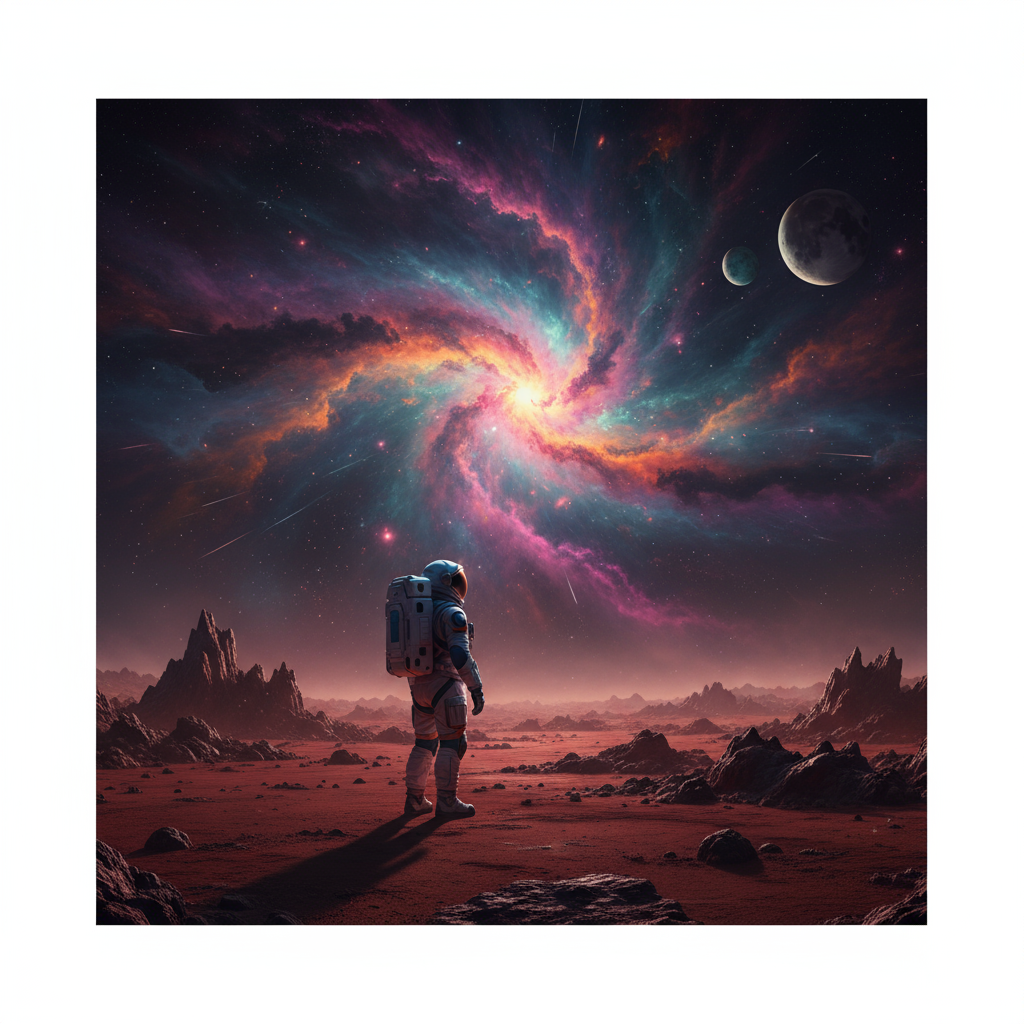

In [6]:
canvas = create_blank_canvas(aspect_ratio="1:1")
prompt = """A cinematic, wide-angle shot of a lone astronaut standing on a desolate alien planet, looking up at a swirling, colorful nebula. The planet's surface is rocky and red, and two moons are visible in the sky. Render this scene on the provided canvas to match its 16:9 aspect ratio."""
contents = [
    types.Content(role="user", parts=[canvas, types.Part.from_text(text=prompt)])
]

print("Generating image with 16:9 aspect ratio...")
generate_and_display_image(contents)

## Recipe 3: Image Outpainting

Outpainting allows you to extend an existing image beyond its original borders. This recipe takes a source image and a larger canvas and intelligently fills in the new areas.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/3_image_outpainting/source_image.png" width="250" />

In [ ]:
source_image_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/3_image_outpainting/source_image.png"
source_image = types.Part.from_uri(file_uri=source_image_path)
canvas = create_blank_canvas(aspect_ratio="16:9")

prompt = """This is a creative outpainting task. Take the provided source image and seamlessly extend it to fill the entire blank canvas. The new areas should logically and stylistically continue the scene from the original image. Imagine what might exist just beyond the borders of the original photo and bring it to life."""

contents = [
    types.UserContent(parts=[source_image, canvas, types.Part.from_text(text=prompt)])
]

print("Performing image outpainting...")
generate_and_display_image(contents)

## Recipe 4: Image Editing

This recipe demonstrates how to edit an existing image with a text prompt. You can add, remove, or change objects and backgrounds.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/4_image_editing/image_to_edit.png" width="250" />

In [ ]:
image_to_edit_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/4_image_editing/image_to_edit.png"


source_image = types.Part.from_uri(file_uri=image_to_edit_path)
prompt = """Please add a red bow tie and a black top hat to the person in the image. Change the background to an elegant ballroom setting with chandeliers and ornate decorations. Ensure the additions look natural and blend seamlessly with the original image.
Render this scene on the provided canvas to match its 16:9 aspect ratio."""

contents = [
    types.Content(role="user", parts=[canvas, source_image, types.Part.from_text(text=prompt)])
]

print("Editing image...")
generate_and_display_image(contents)

## Recipe 5: Style Transfer

Style transfer applies the artistic style of one image or artist to the content of another. Here, we transform a photograph into a painting in the style of a famous artist.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/5_style_transfer/content_image.png" width="250" alt="Content image for style transfer" />

In [ ]:
content_image_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/5_style_transfer/content_image.png"
content_image = types.Part.from_uri(file_uri=content_image_path)
prompt = "Turn this into a Vincent Van Gogh style painting."
contents = [
    types.Content(role="user", parts=[types.Part.from_text(text=prompt), content_image])
]

print("Performing style transfer...")
generate_and_display_image(contents)

## Recipe 6: Photo Restoration

This recipe showcases the model's ability to repair and enhance old or damaged photographs, including colorization and fixing imperfections.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/6_photo_restoration/damaged_photo.png" width="250" />

In [ ]:
damaged_photo_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/6_photo_restoration/damaged_photo.png"
damaged_photo = types.Part.from_uri(file_uri=damaged_photo_path)
prompt = """Restore and color this old photograph as if it was taken by a modern digital camera. Your output shall solely be extracted photograph. ignore surroundings and fill all canvas by the photograph."""
contents = [
    types.Content(role="user", parts=[damaged_photo, types.Part.from_text(text=prompt)])
]

print("Restoring photo...")
generate_and_display_image(contents)

## Recipe 7: Multiple Reference Images
This recipe demonstrates how to combine elements from multiple source images into a single, coherent scene. The model can identify objects and concepts from different inputs and merge them.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/7_multiple_references/bedroom.png" width="250" />
<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/7_multiple_references/items.png" width="250" />

In [ ]:
canvas = create_blank_canvas(aspect_ratio="16:9")

# In a real scenario, these files would exist. We'll use placeholders.
ref_dir = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/7_multiple_references/"
ref_paths = [
    "bedroom.png",
    "items.png",
]

ref_images = [types.Part.from_uri(file_uri=f"{ref_dir}{path}") for path in ref_paths]

prompt = "List all elements of the provided images, then create a new image that combines those elements into a consistent bedroom scene. Use empty bedroom as base preserving its camera angle. Render the final result on the provided blank canvas to ensure a 16:9 aspect ratio."
contents = [
    types.Content(
        role="user", parts=[*ref_images, canvas, types.Part.from_text(text=prompt)]
    )
]

print("Generating image from multiple references...")
generate_and_display_image(contents)

## Recipe 8: Virtual Try-On

This recipe showcases a practical e-commerce application: virtual try-on. It takes an image of a model and an image of a garment and realistically dresses the model in the clothing.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/8_virtual_try_on/model.png" width="250" />
<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/8_virtual_try_on/garment.png" width="250" />

In [ ]:
model_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/8_virtual_try_on/model.png"
garment_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/8_virtual_try_on/garment.png"
model_image = types.Part.from_uri(file_uri=model_path)
garment_image = types.Part.from_uri(file_uri=garment_path)

prompt = "Take the garment from the second image and realistically place it on the person in the first image. Adjust the fit, lighting, and shadows to make it look natural."
contents = [
    types.Content(
        role="user",
        parts=[model_image, garment_image, types.Part.from_text(text=prompt)],
    )
]

print("Performing virtual try-on...")
generate_and_display_image(contents)

## Recipe 9: Product Recontextualization

This recipe is useful for marketing and advertising. It takes a product image with a plain background and places it into a new, more appealing context or scene.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/9_product_recontext/product.png" width="250" />

In [ ]:
product_path = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/9_product_recontext/product.png"
product_image = types.Part.from_uri(file_uri=product_path)
prompt = "Take the product in this image and place it in a professionally styled kitchen setting, on a marble countertop next to a window with soft, natural light. The final image should look like a high-end advertisement."
contents = [
    types.Content(role="user", parts=[product_image, types.Part.from_text(text=prompt)])
]

print("Recontextualizing product...")

generate_and_display_image(contents)

## Recipe 10: Images with Text
This recipe demonstrates the model's ability to generate images that include coherent and well-formatted text, such as creating a menu or a poster.

In [ ]:
prompt = """
    Create a Pizzeria menu with the following content:
    The Artisan Crust Pizzeria
    Crafted Pizza, Simply Delicious.
    Our Signature Pizzas
    Classic Margherita - $11 / $17
    San Marzano tomato, fresh mozzarella, basil.
    Spicy Pepperoni - $12 / $18
    Tomato sauce, mozzarella, premium pepperoni.
    Garden Veggie - $12 / $19
    Tomato sauce, mozzarella, bell peppers, onion, mushrooms, olives.
    Smoky BBQ Chicken - $13 / $19
    BBQ sauce base, grilled chicken, mozzarella, red onion.
    Beverages
    Fountain Soda - $3
    Coca-Cola, Diet Coke, Sprite, Root Beer.
    Bottled Water - $3
    Still or Sparkling.
    Order Online or Call: 555-123-4567
    """
contents = [types.Content(role="user", parts=[types.Part.from_text(text=prompt)])]

print("Generating image with text...")
generate_and_display_image(contents)

## Recipe 11: Character Consistency

Maintaining character consistency across multiple images is a common challenge. This recipe shows how to use a reference image to generate new scenes with the same character in different contexts.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/11_character_consistency/reference.png" width="250" />

In [ ]:
image_file = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/11_character_consistency/reference.png"
image_part = types.Part.from_uri(file_uri=image_file)
canvas = create_blank_canvas(aspect_ratio="9:16")  # Portrait aspect ratio

user_ideas = [
    "The character is US president signing Artificial Intelligence Act and showing it to the camera",
    "The character is a Firefighter posing next to a fire truck in a city street.",
    "The character is a buddhist monk meditating on a mountain top during sunrise",
    "The character is a plumber posing next to a van with plumbing tools (his brand is Nemri Plumbing)",
]

for i, user_idea in enumerate(user_ideas):
    print(f"Generating image {i + 1}/{len(user_ideas)}: {user_idea}")

    contents = [
        image_part,
        canvas,
        types.Part.from_text(
            text="Use previous reference images of the character to generate the new scene"
        ),
        types.Part.from_text(text=user_idea),
        types.Part.from_text(text="make sure to use canvas for aspect ratio"),
    ]

    generate_and_display_image(contents)

## Recipe 12: Shifting Camera Perspective

This recipe demonstrates how to take an existing image and regenerate it from a different camera angle or perspective, as described in a text prompt.

<img src="https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/12_shifting_camera_perspective/original.png" width="250" />

In [ ]:
image_file = "https://storage.googleapis.com/github-repo/generative-ai/gemini/nano-banana/recipes/12_shifting_camera_perspective/original.png"
image_part = types.Part.from_uri(file_uri=image_file)
prompt = "aerial perspective of a camera looking down at the stressed candidate"
contents = [
    types.Content(role="user", parts=[image_part, types.Part.from_text(text=prompt)])
]

print("Shifting camera perspective...")
generate_and_display_image(contents)